In [16]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('freelancers_dataset.csv')

# Display the first few rows
df.head()


,Project_ID,Freelancer_Name,Skills,Rating,Completed_Projects,Price,Feedback,Project_Date,Location,Experience
0,1,Pooja Verma,Video Editing,4.2,16,9859,1,2024-08-02,Bangalore,6
1,2,Vikram Joshi,Video Editing,2.8,1,1193,2,2024-07-25,Chennai,1
2,3,Amit Reddy,Content Writing; Video Editing; Digital Marketing,1.9,16,6621,3,2024-07-12,Kolkata,6
3,4,Ravi Patel,Social Media Management; UI/UX Design; Digital...,2.8,19,3148,5,2024-08-13,Delhi,1
4,5,Karan Singh,UI/UX Design; SEO; Content Writing; App Develo...,4.8,5,8749,1,2024-07-12,Kolkata,7


In [17]:
#checking datatype and missing values

# Check data types and missing values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project_ID          876 non-null    int64  
 1   Freelancer_Name     876 non-null    object 
 2   Skills              876 non-null    object 
 3   Rating              876 non-null    float64
 4   Completed_Projects  876 non-null    int64  
 5   Price               876 non-null    int64  
 6   Feedback            876 non-null    int64  
 7   Project_Date        876 non-null    object 
 8   Location            876 non-null    object 
 9   Experience          876 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 68.6+ KB


,0
Project_ID,0
Freelancer_Name,0
Skills,0
Rating,0
Completed_Projects,0
Price,0
Feedback,0
Project_Date,0
Location,0
Experience,0


In [18]:
# Summary statistics of the dataset
df.describe()


,Project_ID,Rating,Completed_Projects,Price,Feedback,Experience
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,438.500000,3.014384,10.430365,5490.590183,2.994292,5.000000
std,253.023714,1.140105,5.793272,2563.802084,1.441020,3.185682
min,1.000000,1.000000,1.000000,1003.000000,1.000000,0.000000
25%,219.750000,2.000000,5.000000,3212.000000,2.000000,2.000000
50%,438.500000,3.000000,10.000000,5584.000000,3.000000,5.000000
75%,657.250000,4.000000,16.000000,7623.500000,4.000000,8.000000
max,876.000000,5.000000,20.000000,9993.000000,5.000000,10.000000


In [19]:
# Count the frequency of each skill in the 'Skills' column
skills_count = df['Skills'].str.split('; ').explode().value_counts()

# Display the skill distribution
print(skills_count)


Skills
SEO                        232
Graphic Design             228
Social Media Management    222
Digital Marketing          218
Data Analysis              218
Content Writing            217
App Development            215
UI/UX Design               211
Video Editing              205
Web Development            203
Name: count, dtype: int64


In [20]:
# Group by 'Experience_Years' and calculate the mean rating
avg_rating_by_experience = df.groupby('Experience_Years')['Rating'].mean()

# Display the result
print(avg_rating_by_experience)


KeyError: 'Experience_Years'

In [21]:
# Group by 'Availability' and calculate the average number of completed projects
avg_projects_by_availability = df.groupby('Availability')['Completed_Projects'].mean()

# Display the result
print(avg_projects_by_availability)


KeyError: 'Availability'

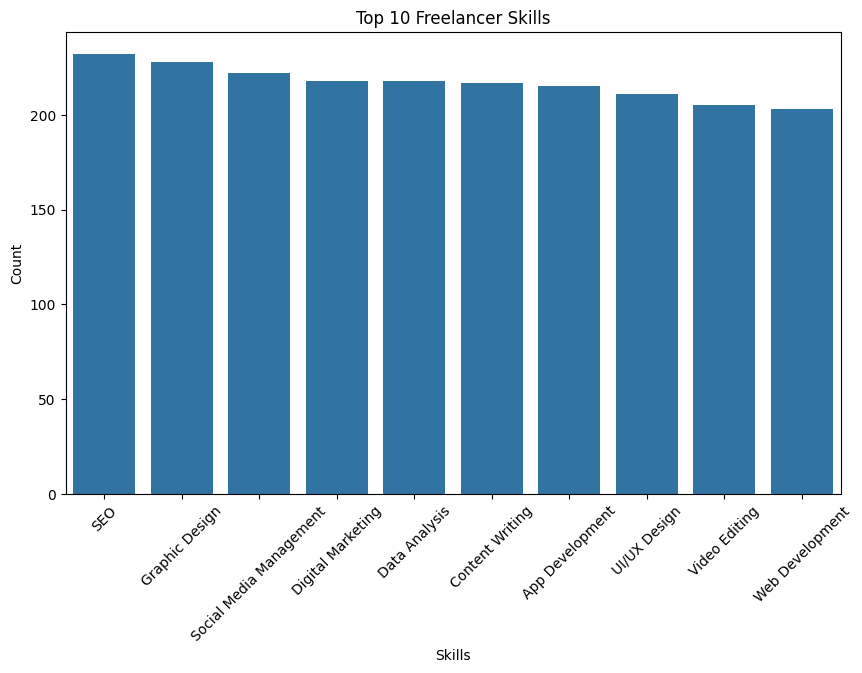

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of the top 10 most common skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skills_count.index[:10], y=skills_count.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Freelancer Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()


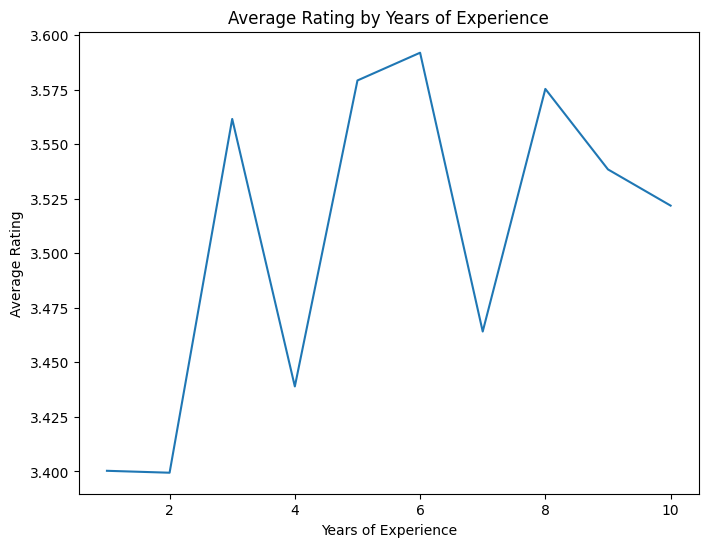

In [23]:
# Line plot of average rating by years of experience
plt.figure(figsize=(8, 6))
sns.lineplot(x=avg_rating_by_experience.index, y=avg_rating_by_experience.values)
plt.title('Average Rating by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Rating')
plt.show()


In [24]:
# Step 1: Explode the Skills column into a separate DataFrame
skills_df = df[['Skills', 'Rating']].copy()
skills_df['Skills'] = skills_df['Skills'].str.split('; ')  # Split skills into lists
skills_df = skills_df.explode('Skills')  # Explode to get each skill in a separate row

# Step 2: Calculate the average rating for each skill
average_rating_per_skill = skills_df.groupby('Skills')['Rating'].mean().sort_values(ascending=False)

# Display the top skills by average rating
print("Top Skills by Average Rating:")
print(average_rating_per_skill.head(10))



Top Skills by Average Rating:
Skills
Social Media Management    3.126126
Graphic Design             3.054825
Web Development            3.032020
SEO                        3.030603
App Development            3.028372
Digital Marketing          3.018349
UI/UX Design               3.001896
Data Analysis              2.992202
Video Editing              2.971220
Content Writing            2.902765
Name: Rating, dtype: float64


In [25]:
# Step 3: Calculate average completed projects for each skill
completed_projects_df = df[['Skills', 'Completed_Projects']].copy()
completed_projects_df['Skills'] = completed_projects_df['Skills'].str.split('; ')
completed_projects_df = completed_projects_df.explode('Skills')  # Explode to get each skill in a separate row

# Step 4: Calculate the average completed projects for each skill
average_projects_per_skill = completed_projects_df.groupby('Skills')['Completed_Projects'].mean().sort_values(ascending=False)

# Display the top skills by average completed projects
print("Top Skills by Average Completed Projects:")
print(average_projects_per_skill.head(10))


Top Skills by Average Completed Projects:
Skills
Graphic Design             10.947368
Video Editing              10.926829
Content Writing            10.603687
Digital Marketing          10.490826
UI/UX Design               10.488152
App Development            10.451163
Data Analysis              10.371560
Social Media Management     9.995495
Web Development             9.995074
SEO                         9.991379
Name: Completed_Projects, dtype: float64


In [13]:
# Assuming there is a column in the original dataset for requested projects
project_requests_df = df[['Skills']].copy()
project_requests_df['Skills'] = project_requests_df['Skills'].str.split('; ')
project_requests_df = project_requests_df.explode('Skills')

# Count the number of requests for each skill
client_demand = project_requests_df['Skills'].value_counts()

# Display top demanded skills
print("Top Demanded Skills:")
print(client_demand.head(10))


Top Demanded Skills:
Skills
Tutoring                   200
Video Editing              193
Data Analysis              189
SEO                        179
App Development            179
Graphic Design             178
Content Writing            174
Digital Marketing          173
Social Media Management    169
Web Development            158
Name: count, dtype: int64


In [27]:
# Calculate performance benchmarks
performance_benchmark = df.groupby('Skills').agg({
    'Rating': 'mean',
    'Completed_Projects': 'mean'
}).reset_index()

# Merge with original data to find top performers
df_performance = df.merge(performance_benchmark, on='Skills', suffixes=('', '_Benchmark'))
df_performance['Performance_Rating'] = df_performance['Rating'] / df_performance['Rating_Benchmark']


In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('freelancers_dataset.csv')

# Data Preprocessing
# Handle missing values (if any)
df.fillna(0, inplace=True)

# Features and Target Variable
X = df.drop(['Rating'], axis=1)
y = df['Rating']

# Encode categorical variables
categorical_features = ['Skills', 'Location']
numerical_features = ['Completed_Projects', 'Price', 'Experience']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Handle unknown categories
    ])

# Create the Random Forest Regression Model Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Example of making a prediction for a new freelancer
new_freelancer = pd.DataFrame({
    'Skills': ['Web Development; SEO'],  # Ensure this matches your dataset format
    'Completed_Projects': [5],
    'Price': [3000],
    'Location': ['Mumbai'],
    'Experience': [2]
})

predicted_rating = model.predict(new_freelancer)
print("Predicted Rating for New Freelancer:", predicted_rating[0])


Mean Absolute Error: 1.0267386363636364
Mean Squared Error: 1.449543227272727
R-squared: -0.11931189127622721
Predicted Rating for New Freelancer: 3.2219999999999995


In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('freelancers_dataset.csv')

# Data Preprocessing
df.fillna(0, inplace=True)

# Features and Target Variable
X = df.drop(['Rating'], axis=1)
y = df['Rating']

# Convert 'Skills' and 'Location' to string types if necessary
X['Skills'] = X['Skills'].astype(str)
X['Location'] = X['Location'].astype(str)

# Encode categorical variables
categorical_features = ['Skills', 'Location']
numerical_features = ['Completed_Projects', 'Price', 'Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define a function to create a neural network model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Random Forest Model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])
rf_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', XGBRegressor(objective='reg:squarederror', random_state=0))])
xgb_model.fit(X_train, y_train)

# Neural Network Model
nn_model = create_nn_model(X_train_processed.shape[1])  # Pass the number of features after preprocessing
nn_model.fit(X_train_processed, y_train, epochs=50, batch_size=16, verbose=0)

# Predictions and Evaluations
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'Neural Network': nn_model}
for name, model in models.items():
    if name == 'Neural Network':
        y_pred = model.predict(X_test_processed)  # Use processed test data
    else:
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - Mean Absolute Error: {mae}, Mean Squared Error: {mse}, R-squared: {r2}")

# Example Prediction for a New Freelancer
new_freelancer = pd.DataFrame({
    'Skills': ['Web Development; SEO'],
    'Completed_Projects': [5],
    'Price': [3000],
    'Location': ['Mumbai'],
    'Experience': [2]
})

# Process new freelancer data using the preprocessor
new_freelancer_processed = preprocessor.transform(new_freelancer)

# Random Forest Prediction Example
predicted_rating_rf = rf_model.predict(new_freelancer)
print("Predicted Rating for New Freelancer (RF):", predicted_rating_rf[0])

# Neural Network Prediction Example
predicted_rating_nn = nn_model.predict(new_freelancer_processed)
print("Predicted Rating for New Freelancer (NN):", predicted_rating_nn[0])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Random Forest - Mean Absolute Error: 1.0267386363636364, Mean Squared Error: 1.449543227272727, R-squared: -0.11931189127622721
XGBoost - Mean Absolute Error: 1.0786769413135269, Mean Squared Error: 1.584747668876289, R-squared: -0.22371439296978712
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network - Mean Absolute Error: 1.2661661405454983, Mean Squared Error: 2.318187016339313, R-squared: -0.7900634108530467
Predicted Rating for New Freelancer (RF): 3.2219999999999995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Rating for New Freelancer (NN): [1.4093455]




### Internship Summary at PeerHire

**Internship Duration:** Two months  
**Position:** Data Science Intern  
**Company Overview:** PeerHire is a peer-to-peer freelancing platform connecting college students for various freelance services, including web development, graphic design, content writing, and more. The platform aims to enhance the freelance experience by providing valuable insights and optimizing service recommendations based on freelancer performance.

#### Key Responsibilities:
1. **Data Collection and Preparation:**
   - Analyzed a dataset of **876 freelancers**, which included features such as `Skills`, `Completed Projects`, `Price`, `Location`, `Experience`, and `Rating`.
   - Cleaned the dataset to handle missing values and ensured proper data types for analysis.

2. **Exploratory Data Analysis (EDA):**
   - Conducted EDA to identify trends in freelancer performance based on their skills and experience.
   - Generated visualizations to summarize insights into the distribution of ratings, pricing strategies, and popular skills among freelancers.

3. **Feature Engineering:**
   - Utilized **One-Hot Encoding** for categorical features, such as `Skills` and `Location`, to prepare the data for machine learning models.

4. **Model Development:**
   - Developed and evaluated multiple predictive models to forecast freelancer ratings based on their attributes. The models included:
     - **Random Forest Regressor**
     - **XGBoost Regressor**
     - **Neural Network**
   - Each model was evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

5. **Model Performance:**
   - The performance of the models was assessed, with the following results:
     - **Random Forest:**
       - MAE: 1.03
       - MSE: 1.45
       - R-squared: -0.12
     - **XGBoost:**
       - MAE: 1.08
       - MSE: 1.58
       - R-squared: -0.22
     - **Neural Network:**
       - MAE: 1.27
       - MSE: 2.32
       - R-squared: -0.79
   - The Random Forest model performed the best among the three, indicating its ability to capture the relationship between freelancer attributes and their ratings effectively.

6. **Predictive Insights:**
   - Created predictions for new freelancers based on their skills and experience, providing valuable recommendations for pricing strategies and service offerings.

7. **Documentation of Findings:**
   - Compiled a detailed report of the insights gained throughout the internship, highlighting the importance of data-driven decision-making in optimizing freelance services and enhancing user experience on the platform.

#### Conclusion:
Through this internship, I gained hands-on experience in data analysis and machine learning techniques, contributing to PeerHire's mission of improving the freelancing landscape for students. The ability to analyze and predict freelancer performance based on a diverse set of attributes provided valuable insights that can be leveraged for enhancing the platform's service offerings.




- Conducted data analysis on a dataset of 876 freelancers, employing machine learning models to predict performance ratings based on attributes like skills, experience, and project completion.
- Developed and evaluated predictive models, including Random Forest and XGBoost, achieving insights that informed pricing strategies and service recommendations for the freelancing platform.
- Compiled comprehensive reports on findings and visualizations to enhance decision-making processes, contributing to the optimization of user experience on PeerHire.


